**Project Objective:** 

To design and implement a machine learning–driven dynamic pricing system that adjusts
prices in real-time or periodically to maximize revenue and maintain competitiveness.
The system will leverage historical sales, inventory to predict optimal prices using advanced
ML techniques.
By ensuring adaptability and transparency, the platform will help businesses increase
profitability while preserving customer trust.

collect data from kaggle Dynamic pricing dataset - https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset/data

**Milestone 1: Requirement & Data Preparation**



Step1:install required libraries and import it

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn scipy


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install xgboost lightgbm catboost
!pip install flask fastapi uvicorn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install joblib


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization style
plt.style.use('classic')
sns.set_theme(style="whitegrid")


Step 2: Load Dataset

In [4]:
# Load the CSV file
df = pd.read_csv('dynamic_pricing.csv')

# Show first few rows
df.head()        #head()=> gives a preview of first 5 rows.


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


Step3: Feature Engineering:

clean and aggregate datasets 

Step 3: Understand the size, columns, data types, and basic stats of numerical features.

In [3]:
# Shape of dataset
print("Dataset shape:", df.shape)

# Columns
print("\nColumns:", df.columns.tolist())

# Data types and memory usage
df.info()

# Summary statistics for numerical columns
df.describe()


Dataset shape: (1000, 10)

Columns: ['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


Step 4: Identify missing or duplicate data that may require cleaning.

In [4]:
# Check missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Missing Count', 'Missing Percent']
print("\nMissing Values:")
print(missing_data[missing_data['Missing Count'] > 0])

# Check duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())



Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percent]
Index: []

Number of duplicate rows: 0


Step 5: Separate Numerical & Categorical Columns

In [5]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

print("Numerical Columns:", numerical_columns.tolist())
print("Categorical Columns:", categorical_columns.tolist())


Numerical Columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
Categorical Columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']


Step 6: Exploratory Visualizations

6.1 Numerical Feature Distributions

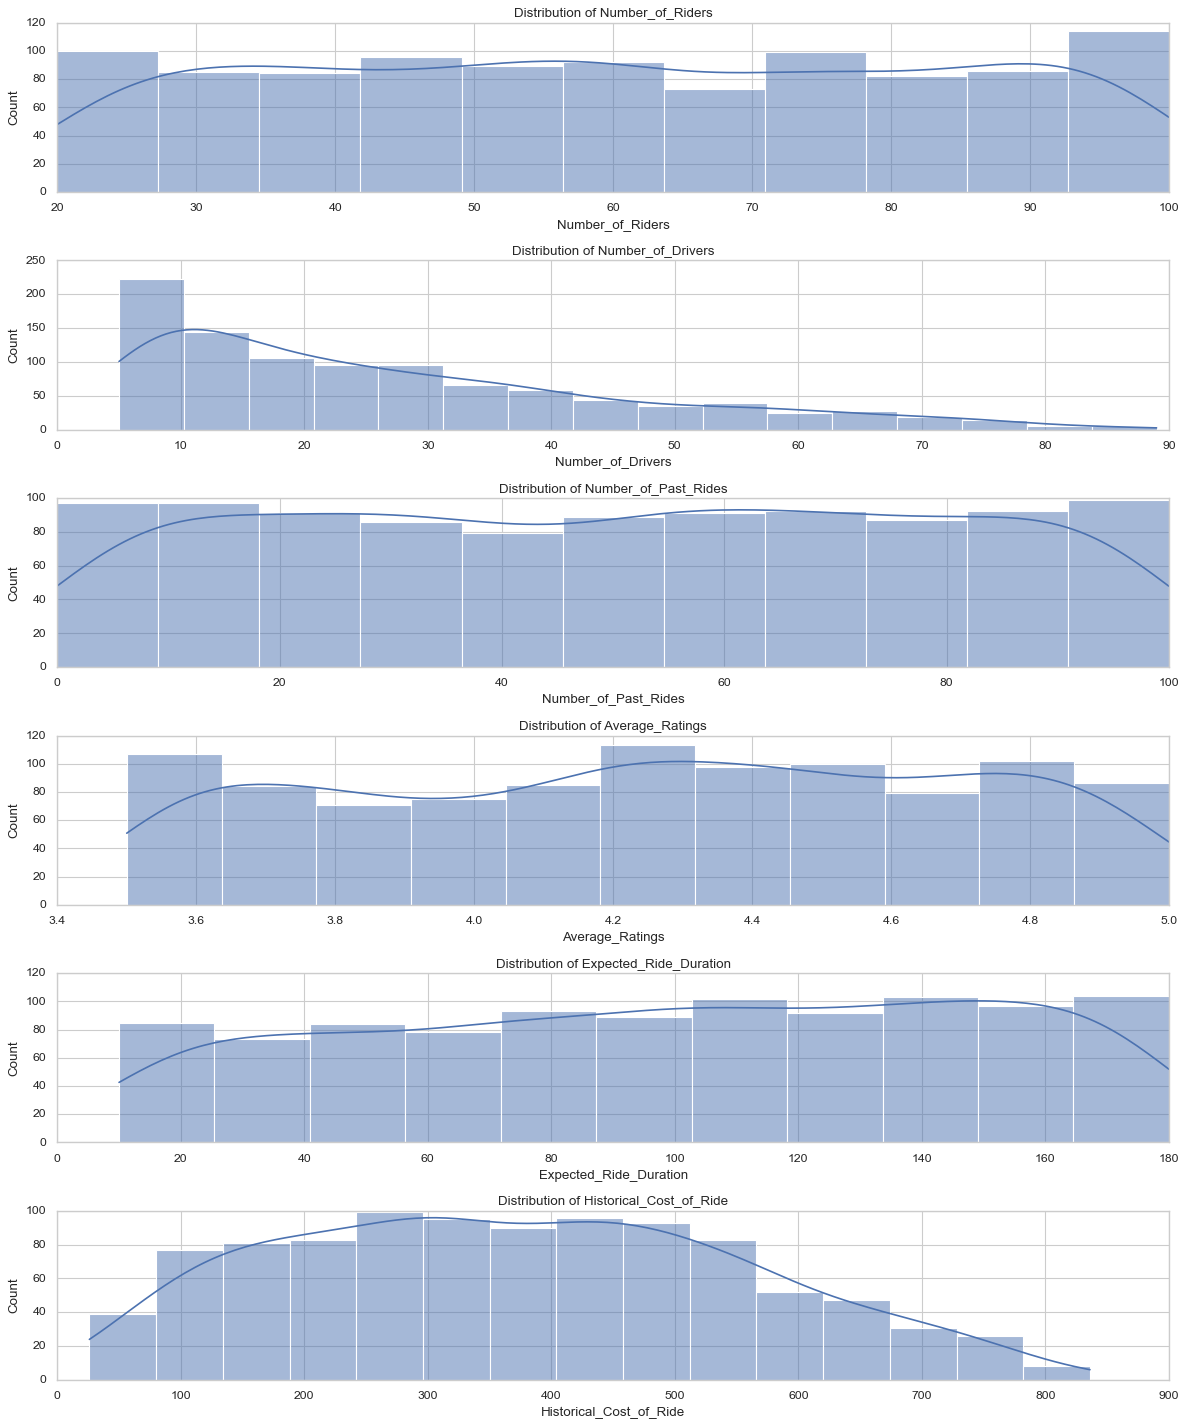

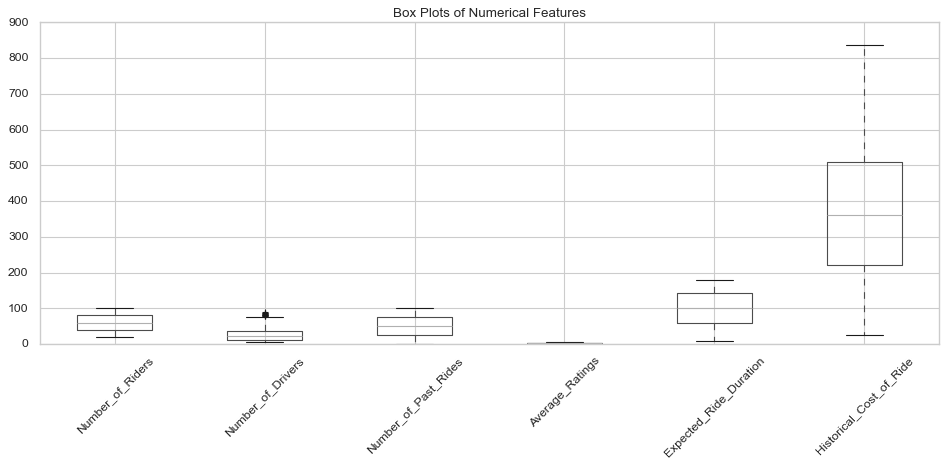

In [6]:
# Histograms
plt.figure(figsize=(15, len(numerical_columns) * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plots of Numerical Features')
plt.tight_layout()
plt.show()


6.2 Categorical Feature Distributions

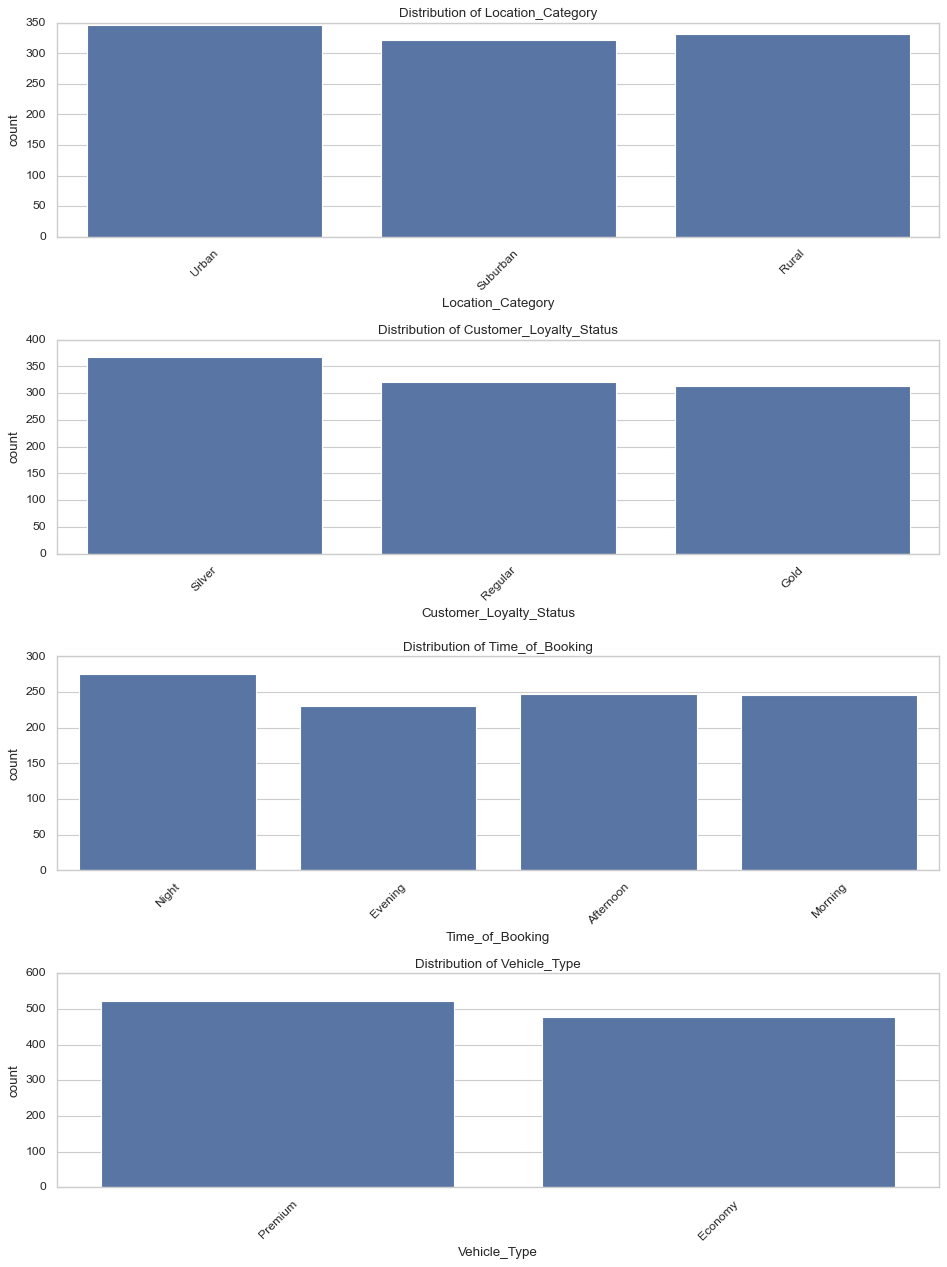

In [7]:
# Count plots
if len(categorical_columns) > 0:
    plt.figure(figsize=(12, 4 * len(categorical_columns)))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(len(categorical_columns), 1, i)
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Step 7: Correlation Analysis

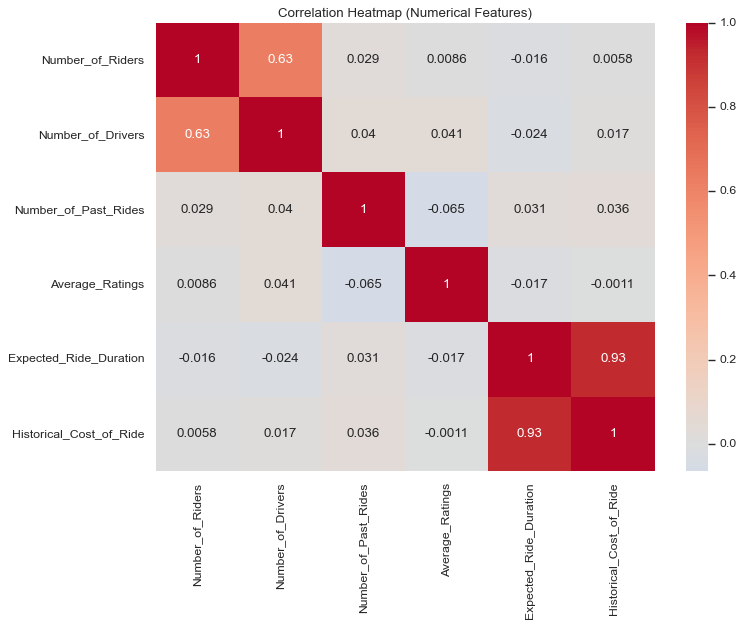

In [8]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()
